In [6]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Data Prepation

In [7]:
# path of data 
path = 'Automobile_Data.csv'  # I changed the file name
df = pd.read_csv(path)

# cleaning the data here
#  replacing '?' to None value
df.replace('?', np.nan, inplace=True)

# showing dtypes
print(df.dtypes)

df.head()

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [8]:
# define necessary functions

# Function: filling missing data
def fill_missing(df: pd.DataFrame, cols: list, mode: str = 'mean'):
    """
    Based on the 'mode' argument, filling the missing values

    Paramters:
    - df: the original dataframe
    - cols: the column names that will fill missing data
    - mode: either one of string: 'mean' or 'median'
    """
    # make sure that all columns are float types
    df[cols] = df[cols].astype(float)
    # fill missing data
    if mode == 'mean':
        df[cols] = df[cols].fillna(df[cols].mean())

    elif mode == 'median':
        df[cols] = df[cols].fillna(df[cols].median())

    else:
        pass

    return df


In [9]:
print(
"""
Since our focuses are the four independents variables (Xs) and one dependent variable (Y),
 so, I will apply data pre-processing methods to them in order to start the multiple regression analysis.
- X1: horsepower
- X2: curb-weight
- X3: engine-size
- X4: highway-mpg
- Y: price
"""
)

# define Xs
Xs = ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']
Y = 'price'

# filling missing variables by mean
new_df = fill_missing(df, Xs + [Y], 'mean')
# showing first 5 rows
new_df[Xs + [Y]].head()



Since our focuses are the four independents variables (Xs) and one dependent variable (Y),
 so, I will apply data pre-processing methods to them in order to start the multiple regression analysis.
- X1: horsepower
- X2: curb-weight
- X3: engine-size
- X4: highway-mpg
- Y: price



,horsepower,curb-weight,engine-size,highway-mpg,price
0,111.0,2548.0,130.0,27.0,13495.0
1,111.0,2548.0,130.0,27.0,16500.0
2,154.0,2823.0,152.0,26.0,16500.0
3,102.0,2337.0,109.0,30.0,13950.0
4,115.0,2824.0,136.0,22.0,17450.0


# Model Creation - 01

In [10]:
# splitting the data to train and test

# define both predictor(X) and response(Y) variable
df_X, df_Y = df[Xs], df[Y]

# spliting df into train(70%) and test(30%) data
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=0.3, random_state=42)

In [11]:
# create the model
model = LinearRegression()
# fit the data
model.fit(X_train, Y_train)
# get predicted variables
Y_hat = model.predict(X_test)
# show the first 5 result
print(Y_hat[:5])

# show equation result (including intercept & coefficients)
print(f"""
- We should get a final linear model with the structure:
   Y_hat = a + b1*X1 + b2*X2 + b3*X3 + b1*X4

- Plugging in the actual values we get:
   Price = {model.intercept_} + {model.coef_[0]}*X1 + {model.coef_[1]}*X2 + {model.coef_[2]}*X3 + {model.coef_[3]}*X4

- The brief evaluation of this model is shown as follow
   - X1 ~ X3 independent variables would affect the positive impact on the price: the higher number of those variables, the higher the price.
   - On the other hand, only X4 independent variable affects the negative impact on the price: the higher "highway-mpg", the lower the price.

""")

[25752.8915041  17267.56620919 10921.76108983 13512.62824051
 23635.52472116]

- We should get a final linear model with the structure:
   Y_hat = a + b1*X1 + b2*X2 + b3*X3 + b1*X4

- Plugging in the actual values we get:
   Price = 61.64996981975128 + 3.8515073358368954*X1 + 2.813488220359295*X2 + 101.3154451092239*X3 + -239.64671729231173*X4

- The brief evaluation of this model is shown as follow
   - X1 ~ X3 independent variables would affect the positive impact on the price: the higher number of those variables, the higher the price.
   - On the other hand, only X4 independent variable affects the negative impact on the price: the higher "highway-mpg", the lower the price.




# Model Evaluations - 01

In [12]:
# get residuals (actual y - predicted y)
res = [a - p for a, p in zip(Y_test, Y_hat)]

# get sum of squared errors
sse = sum([res**2 for res in res])
print('Sum of the Squared Error (SSE): ', sse)
# get mean of square deviation
mse = sse / len(Y_hat)
print('Mean of Square Deviation (MSE): ', mse)
# get root of MSE
rmse = mse**0.5
print('Root-Mean-Squared_Error (RMSE): ', rmse)

Sum of the Squared Error (SSE):  1154487479.2757132
Mean of Square Deviation (MSE):  18620765.794769567
Root-Mean-Squared_Error (RMSE):  4315.17853567724



For the evaluation of this multiple linear regression mode, 
 although the sum of the squared difference would be big, 1154487479.2757132,
 the plotted line 



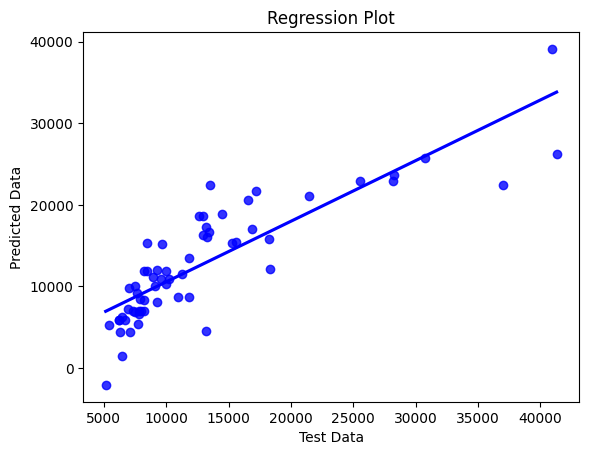

In [13]:
# Comparing the actual and predicted data
sns.regplot(x=Y_test, y=Y_hat, ci=None, color="b")

plt.title('Regression Plot')
plt.xlabel('Test Data')
plt.ylabel('Predicted Data')

print(f"""
For the evaluation of this multiple linear regression mode, 
 although the sum of the squared difference would be big, {sse},
 the plotted line 
""")

In [14]:
# Evaluation the impact of each independent variable

def model_coef_test(X: pd.DataFrame, Y: pd.Series, model: LinearRegression):
    """
    Testing the impact of each independent variable against an dependent variable.

    Parameters:
    - X: dataframe of independent variables (Xs)
    - Y: list of actual dependent variables (Y)
    - model: trained model
    """
    # define predicted data from X
    Y_hats_dict = {'Actual': list(Y)}
    # define RMSE
    RMSEs_dict = {}
    # get all independent variable names
    X_names = list(X.columns)
    # define intercept and coefficients
    intercept = model.intercept_
    coef = model.coef_

    print("Original Coef", coef)
    # adding predicted variables without any changes
    Y_hats_dict['Origin_Y_hat'] = list(np.dot(X.values, coef) + intercept)

    # traversing all options
    for i in range(len(X.columns)):
        # copy coefficient to prevent original one from changing
        coef_copy = coef.copy()
        # modifying the coefficient
        coef_copy[i] = 0
        print(f"Del coef of '{X_names[i]}'", coef_copy)
        # store all predicted variables
        Y_hats_dict[f'del_{X_names[i]}'] = list(np.dot(X.values, coef_copy) + intercept)

    # get the dataframe of Y_hats
    Y_hats_df = pd.DataFrame(Y_hats_dict)
    
    # Get the dataframe of RMSEs based on actual Y values
    #  define actual value
    actual = Y_hats_dict['Actual']
    #  traversing all keys of Y_hats
    for k in Y_hats_dict.keys():
        # if key is "actual", skip the loop
        if k == 'Actual':
            continue
        # otherwise, 
        else:
            # define observed Y_hat
            prediction = Y_hats_dict[k]
            # calculate sum of squared errors (SSE)
            sse = sum([(a - p)**2 for a, p in zip(actual, prediction)])
            # calculate mean of squared errors (MSE)
            mse = sse / len(actual)
            # calculate root of MSE (RMSE)
            rmse = mse**0.5
            # add RMSE to dictionary
            RMSEs_dict[k] = [rmse]

    RMSEs_df = pd.DataFrame(RMSEs_dict)

    return Y_hats_df, RMSEs_df

# Function

# get the predicted variables
Y_hats_df, RMSEs_df = model_coef_test(X_test, Y_test, model)
print('')
print('Comparing the RMSEs for each condition of coefficients:')
print(RMSEs_df)
print('')
Y_hats_df.head()

print("""
The followings are conclusions based on RMSEs that we can get from different coefficitions:
- When the coefficient of "engine-size" is 0, RMSE was bigger then the Origin_Y_hat, which is calculated from the original coefficiant without any change;
   it implies that the independent variable "engine_size" is the biggest impact on the dependent variable "price", so we should not remove it from the model.
- Considering that RMSE is the almost the same as the original (4315.178536) if we set the coefficient of "horsepower" as 0,
   we can conclude that the independent variable "horsepower" does not affect on the dependent variable, so we can remove it from this car price model.
- When we remove the coefficients of "curb_weight" or "highway-mpg", RMSE increases by twice from the state where the coefficients is not modified at all;
   therefore, both independent vairables are likely to affect the changes in car price, but its impact will be less than the "engine-size".
""")

Original Coef [   3.85150734    2.81348822  101.31544511 -239.64671729]
Del coef of 'horsepower' [   0.            2.81348822  101.31544511 -239.64671729]
Del coef of 'curb-weight' [   3.85150734    0.          101.31544511 -239.64671729]
Del coef of 'engine-size' [   3.85150734    2.81348822    0.         -239.64671729]
Del coef of 'highway-mpg' [  3.85150734   2.81348822 101.31544511   0.        ]

Comparing the RMSEs for each condition of coefficients:
   Origin_Y_hat  del_horsepower  del_curb-weight  del_engine-size  \
0   4315.178536     4357.114991      8582.296393     14461.971149   

   del_highway-mpg  
0      8552.312993  


The followings are conclusions based on RMSEs that we can get from different coefficitions:
- When the coefficient of "engine-size" is 0, RMSE was bigger then the Origin_Y_hat, which is calculated from the original coefficiant without any change;
   it implies that the independent variable "engine_size" is the biggest impact on the dependent variable "pri

# Model Creation - 02

In [15]:
# create second model
model2 = LinearRegression()

# define Xs and Y (applying train split as well)
Xs2 = ['normalized-losses', 'highway-mpg']
Y2 = 'price'

# filling missing variables by mean
new_df = fill_missing(df, Xs2 + [Y2], 'mean')

# spliting df into train(70%) and test(30%) data
X2_train, X2_test, Y2_train, Y2_test = train_test_split(df[Xs2], df[Y2], test_size=0.3, random_state=42)

# training the model
model2.fit(X2_train, Y2_train)

# get predicted variables
Y2_hat = model2.predict(X2_test)
# show the first 5 result
print(Y2_hat[:5])

# show equation result (including intercept & coefficients)
print(f"""
- We should get a final linear model with the structure:
   Y_hat = a + b1*X1 + b2*X2

- Plugging in the actual values we get:
   Price = {model2.intercept_} + {model2.coef_[0]}*X1 + {model2.coef_[1]}*X2

- The brief evaluation of this model is shown as follow
   - The first independent variable (X1) would affect the positive impact on the price: the higher "normalized-losses", the higher the price.
   - On the other hand, the second independent variable (X2) affects the negative impact on the price: the higher "highway-mpg", the lower the price.

""")

[20970.06779693 20970.06779693  9872.20317399 15533.86747376
 18117.31553821]

- We should get a final linear model with the structure:
   Y_hat = a + b1*X1 + b2*X2

- Plugging in the actual values we get:
   Price = 40842.26106226227 + 3.1314441194218054*X1 + -920.6467930863289*X2

- The brief evaluation of this model is shown as follow
   - The first independent variable (X1) would affect the positive impact on the price: the higher "normalized-losses", the higher the price.
   - On the other hand, the second independent variable (X2) affects the negative impact on the price: the higher "highway-mpg", the lower the price.




# Model Evaluation - 02

In [19]:
# get sum of squared errors
sse2 = sum([(a - p)**2 for a, p in zip(Y2_test, Y2_hat)])
print('Sum of the Squared Error (SSE): ', sse2)
# get mean of square deviation
mse2 = sse2 / len(Y2_hat)
print('Mean of Square Deviation (MSE): ', mse2)
# get rmse
rmse2 = mse2**0.5
print('Root-Mean-Squared_Error (RMSE): ', rmse2)

Sum of the Squared Error (SSE):  3143084841.0710993
Mean of Square Deviation (MSE):  50694916.79146934
Root-Mean-Squared_Error (RMSE):  7120.036291443278



- Based on the output graph, two independent variables 'normalized-losses' & 'highway-mpg' seem to be difficult to explain the car price by linear relationship.
- It is because the regression line cannot capture the points in left side on the graph.



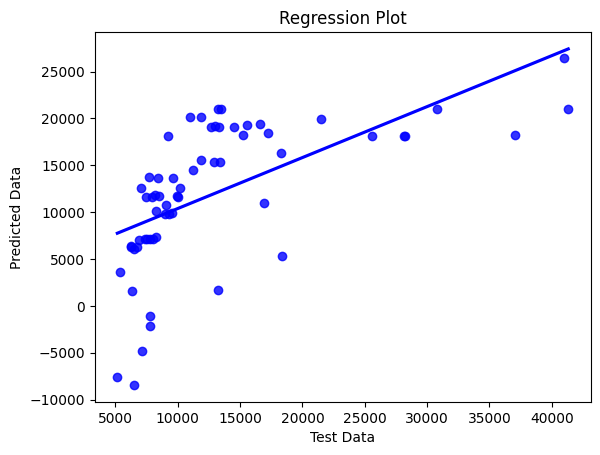

In [17]:
# Comparing the actual and predicted data
sns.regplot(x=Y2_test, y=Y2_hat, ci=None, color="b")

plt.title('Regression Plot')
plt.xlabel('Test Data')
plt.ylabel('Predicted Data')

print(f"""
- Based on the output graph, two independent variables 'normalized-losses' & 'highway-mpg' seem to be difficult to explain the car price by linear relationship.
- It is because the regression line cannot capture the points in left side on the graph.
""")

# Comparing Two Models

In [18]:
print(f"""
- Comparing RMSEs:
    - Model 1: {rmse}
    - Model 2: {rmse2}
- It would be clear that model 1 would be superior to model 2 based on the smaller errors between the actual and predicted dependent variable (price).
- Also, if we compare the two regression plots from seaborn, the regression line on model 1 can fit the actual data point more than model 2.
""")


- Comparing RMSEs:
    - Model 1: 4315.17853567724
    - Model 2: 7120.036291443278
- It would be clear that model 1 would be superior to model 2 based on the smaller errors between the actual and predicted dependent variable (price).
- Also, if we compare the two regression plots from seaborn, the regression line on model 1 can fit the actual data point more than model 2.

